[*********************100%***********************]  1 of 1 completed

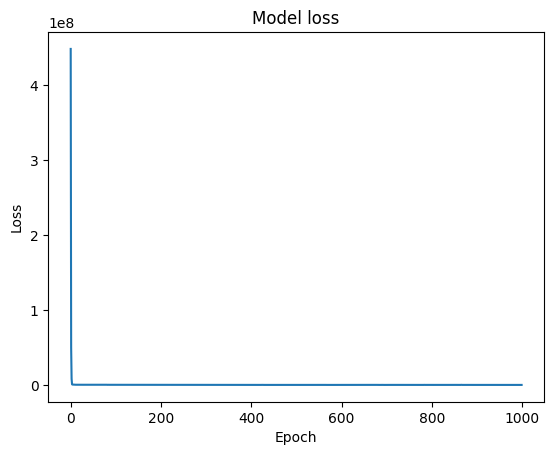

14/14 [==============================] - 0s 632us/step


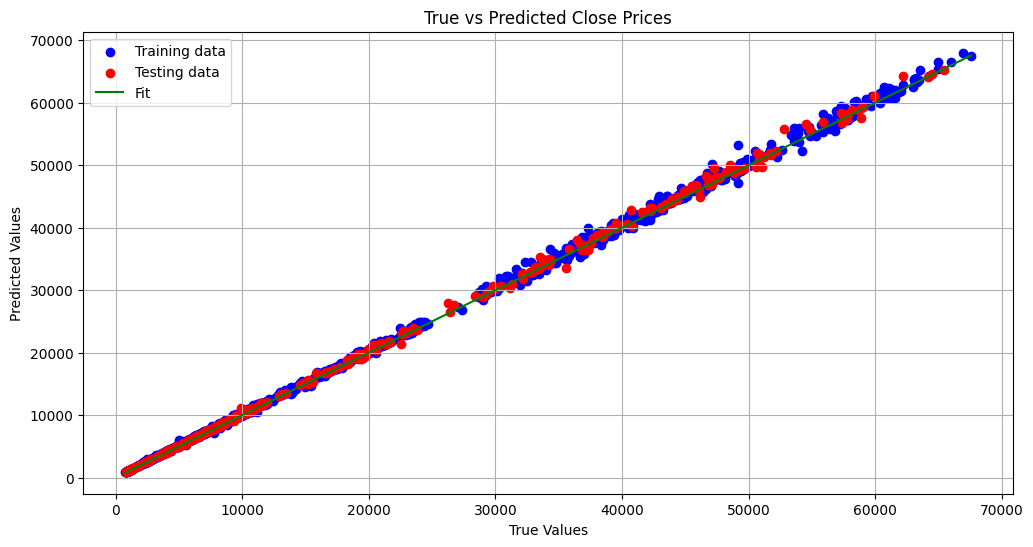

14/14 [==============================] - 0s 1ms/step
MAE: 294.63015872485016 -> indicates that the model is an average of 294.63015872485016 off from the true value
MSE: 236286.61922188808 -> indicates that the model has an average error of 236286.61922188808
RMSE: 486.093220711715 -> indicates that the model has an average error of 486.093220711715
R^2: 0.9991832111186496 -> indicates that the model explains 0.9991832111186496 of the variance in the data


In [7]:
""" 
Neural net regression with tensorflow
Plots the relationship between high, low, open, volume and close prices
Note: the results are as expected, unless we add different features to the model there cannot be much expectations
"""
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
from sklearn import metrics

stock_symbol = "BTC-USD"
start_date = "2017-01-01"
end_date = "2022-12-31"

data = yf.download(stock_symbol, start=start_date, end=end_date)

features = data[["High", "Low", "Open", "Volume"]]
target = data["Close"]

# split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# normalize the data
scaler = MinMaxScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
     tf.keras.layers.Dense(1)

])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

fit = model.fit(features_train, target_train, epochs=1000, verbose=0)

# for plotting the loss function
def plot_loss(fit):
    plt.plot(fit.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

plot_loss(fit)

# make predictions
train_preds = model.predict(features_train)
test_preds = model.predict(features_test)

# plot  results
# @todo create plot_results function
plt.figure(figsize=(12, 6))
plt.scatter(target_train, train_preds, color='blue', label='Training data')
plt.scatter(target_test, test_preds, color='red', label='Testing data')

# plot fit line
x = np.linspace(min(target_train.min(), target_test.min()), max(target_train.max(), target_test.max()), 100)
plt.plot(x, x, color='green', label='Fit')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Close Prices')
plt.legend()
plt.grid(True)
plt.show()



# make predictions on the test set
preds_test = model.predict(features_test)

# calculate the metrics for evaluating the model
mae = metrics.mean_absolute_error(target_test, preds_test)
mse = metrics.mean_squared_error(target_test, preds_test)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(target_test, preds_test)

print(f'MAE: {mae} -> indicates that the model is an average of {mae} off from the true value')
print(f'MSE: {mse} -> indicates that the model has an average error of {mse}')
print(f'RMSE: {rmse} -> indicates that the model has an average error of {rmse}')
print(f'R^2: {r2} -> indicates that the model explains {r2} of the variance in the data')
